# Hinchamiento de hidrogel.

Se tienen los siguientes datos de cambios dimensionales en el tiempo:

| Tiempo(min) | Ancho(cm) | Alto(cm) | Grosor(cm) |
|-----------|-----------|-----------|-----------|
| 00 | 1.00 | 2.50 | 1.00 |
| 15 | 1.10 | 2.90 | 1.10 |
| 30 | 1.60 | 3.10 | 1.60 |
| 45 | 1.95 | 3.20 | 1.90 |
| 60 | 1.50 | 2.95 | 1.50 |

El mecánismo de absorción de agua se da gracias a un movimiento browniano por parte del soluto, es decir, estas a partir de rebotes a aleatorios encuentran una zona de mayor estabilidad dentro del hidrogel, que tiene una concentración menor del soluto en su interior, esto hasta alcanzar un equilibrio donde se logra una distribución homogénea del agua dentro del hidrogel[1]. Sin embargo, el mecanismo de hinchamiento no es puramente difusivo, esto se evidencia en el hecho de que el hidrogel tiende a mantener su forma; en un proceso solamente difusivo, el cuerpo tiende a hacerse mas ancho que largo, pero en este caso el material posee un módulo de cizalla que minimiza las deformaciones anisotrópicas[2]. Esto se evidencia comparando las curvas de variaciones superficiales, donde todas las caras del cuerpo conservan cierta relación en su hinchamiento.


## Bibliografía.
[1]https://hydrogeldesign.org/diffusivity/#:~:text=Diffusivity%20is%20the%20average%20speed,bouncing%20around%20of%20nearby%20molecules.

[2]https://sci-hub.3800808.com/



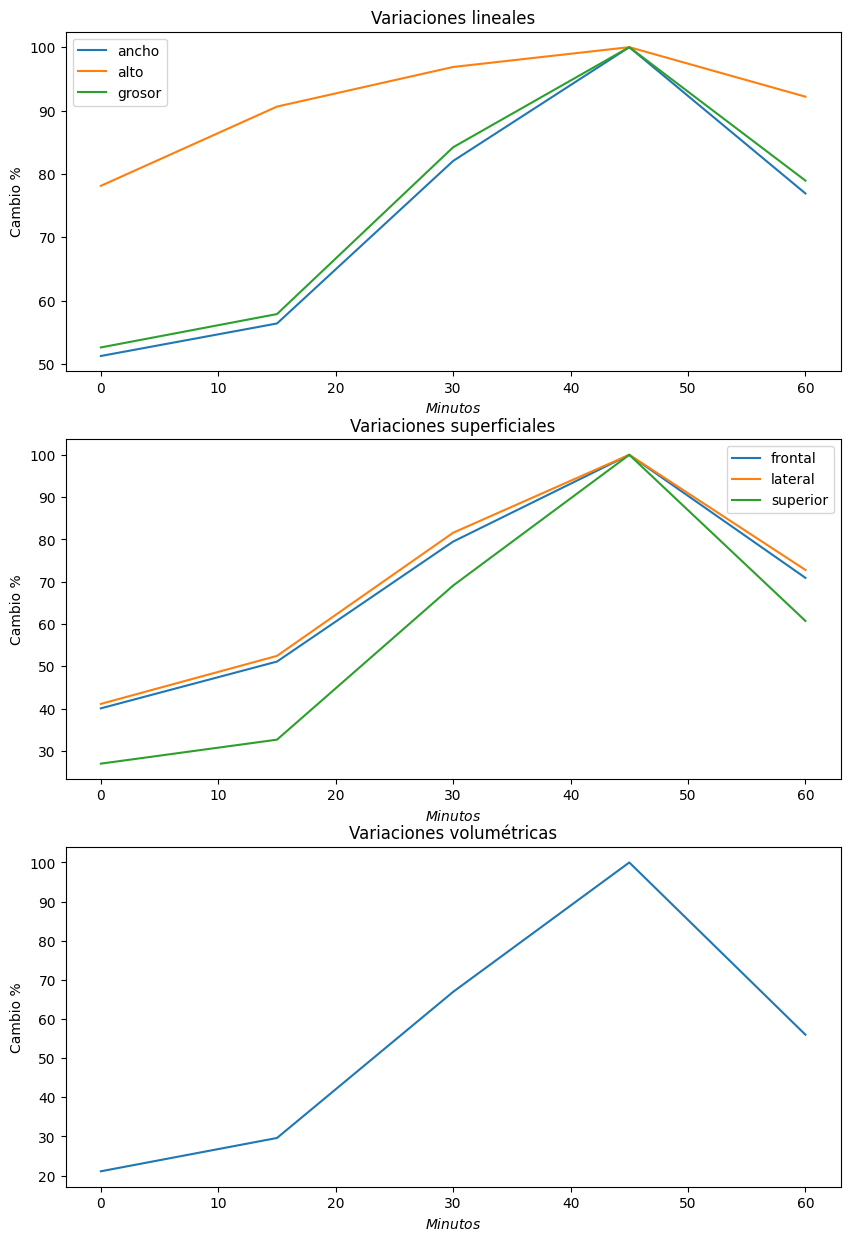

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Tabular los datos
data = {'tiempo(min)':[0, 15, 30, 45, 60],
        'ancho':[1, 1.1, 1.6, 1.95, 1.5],
        'alto':[2.5, 2.9, 3.1, 3.2, 2.95],
        'grosor':[1, 1.1, 1.6, 1.9, 1.5],}

df = pd.DataFrame(data)
# Calcular áreas superficiales en cada tiempo y cara y añadir al df
car_frontal = []
for i in range(df.shape[0]):
  car_frontal.append(df.loc[i]['ancho'] * df.loc[i]['alto'])

df['frontal'] = car_frontal

car_lateral = []
for i in range(df.shape[0]):
  car_lateral.append(df.loc[i]['grosor'] * df.loc[i]['alto'])

df['lateral'] = car_lateral

car_superior = []
for i in range(df.shape[0]):
  car_superior.append(df.loc[i]['ancho'] * df.loc[i]['grosor'])

df['superior'] = car_superior

# Calcular los volumenes en cada tiempo y añadir al df
vol = []
for i in range(df.shape[0]):
  vol.append(df.loc[i]['ancho'] * df.loc[i]['alto']
             * df.loc[i]['grosor'])

df['volumen'] = vol

fig, ax = plt.subplots(3, figsize=(10,15))
# Graficar las variaciones dimensionales
for column in df.iloc[:,1:4]:
  ax[0].plot(df['tiempo(min)'], (df[column]*100)/(df[column].max()), label=column)

ax[0].set_xlabel('$Minutos$')
ax[0].set_ylabel('Cambio %')
ax[0].set_title("Variaciones lineales")
ax[0].legend()

# Graficar las variaciones de áreas superficiales
for column in df.iloc[:,4:7]:
  ax[1].plot(df['tiempo(min)'], (df[column]*100)/(df[column].max()), label=column)

ax[1].set_xlabel('$Minutos$')
ax[1].set_ylabel('Cambio %')
ax[1].set_title("Variaciones superficiales")
ax[1].legend()

# Graficar las variaciones volumétricas
ax[2].plot(df['tiempo(min)'], (df['volumen']*100)/(df['volumen'].max()), label='volumen')
ax[2].set_xlabel('$Minutos$')
ax[2].set_ylabel('Cambio %')
ax[2].set_title("Variaciones volumétricas")
plt.show()
